In [74]:
%matplotlib inline

import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import misc
import skimage
from skimage.transform import resize
from skimage.transform import rotate
from numpy import reshape,uint8
from scipy.cluster.vq import kmeans,vq
DATAFOLDER = 'data/'
IMAGE_FOLDER = DATAFOLDER + 'roof_images/'

In [64]:
df = pd.read_csv(DATAFOLDER + 'id_train.csv')
ids = list(df['Id'])
print(len(ids))
df.head()

8000


,Id,label
0,-3935637,4
1,-2815459,3
2,-2355684,3
3,-2343303,4
4,-1981985,2


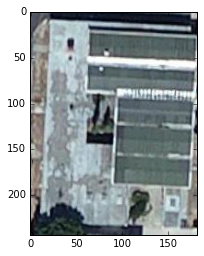

In [65]:
img_path = IMAGE_FOLDER + str(ids[1]) + '.jpg'
img = misc.imread(img_path)
plt.imshow(img)

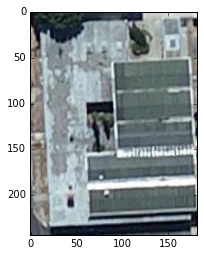

In [66]:
# horizontal flip
plt.imshow(img[::-1,:,:])

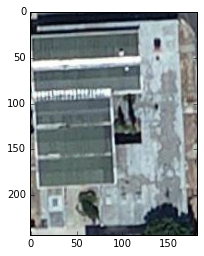

In [67]:
# Vertical flip
plt.imshow(img[:,::-1,:])

[[ 80  87  89 ..., 161 158 184]
 [ 83  89  90 ..., 166 165 184]
 [ 87  90  90 ..., 181 178 185]
 ..., 
 [ 62  22   3 ..., 211 213 214]
 [103  44   4 ..., 206 210 213]
 [137  64   7 ..., 204 207 210]]


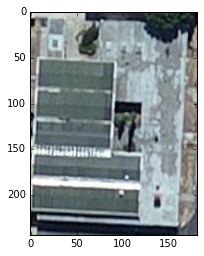

In [68]:
# Rotation 180°
plt.imshow(img[::-1,::-1,:])
print img[:,:,0]

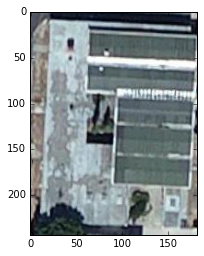

Shape of initial image (182L, 244L, 3L)
Pixel value for new image [128 142 142]
Corresponding pixel value for old image [128 142 142]


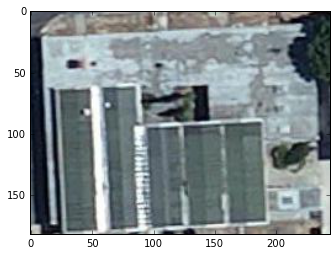

In [69]:
"Transposition"
new_img = np.zeros((img.shape[1], img.shape[0], img.shape[2]),dtype='uint8')
for i in range(3):
    new_img[:,:,i] = img[:,:,i].transpose()
    
"""for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        #for k in range(img.shape[2]):
            new_img[j,i,:] = img[i,j,:]"""
            
plt.imshow(img)
plt.show()
plt.imshow(new_img)
i, j = 25, 100
print 'Shape of initial image', new_img.shape
print 'Pixel value for new image', new_img[j,i,:]
print 'Corresponding pixel value for old image', img[i,j,:]

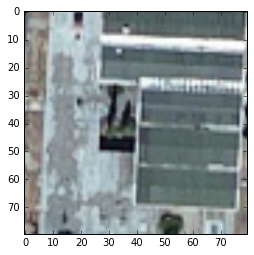

In [70]:
#Resize and crop into a square with width = 80
newWidth = 80
l0 = img.shape[0]
l1 = img.shape[1]
if l0<l1:
    newHeight = newWidth*l1/l0
    #resizing
    new_img = resize(img,(newWidth,newHeight,3))
    #cropping
    new_img = new_img[:,newHeight/2-40:newHeight/2+40,:]
else:
    newHeight = newWidth*l0/l1
    new_img = resize(img,(newHeight,newWidth,3))
    new_img = new_img[newHeight/2-40:newHeight/2+40,:,:]
plt.imshow(new_img)

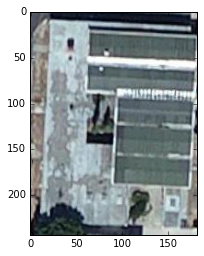

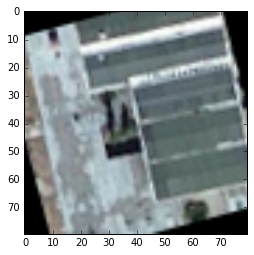

In [71]:
#Rotation
l0 = img.shape[0]
l1 = img.shape[1]

new_img = rotate(new_img,15)
#new_img = rotate(new_img,15,resize=True)
plt.imshow(img)
plt.show()
plt.imshow(new_img)

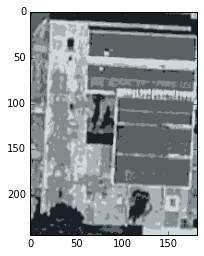

In [93]:
w = img.shape[0]
l = img.shape[1]
imgReshaped = np.reshape(img.astype(np.float32),(w*l,3))/255
kmeans = KMeans(n_clusters=5, random_state=0).fit(imgReshaped)
labels = kmeans.predict(imgReshaped)
newImg = np.zeros((w,l,3))
label_idx = 0
codebook = kmeans.cluster_centers_
for i in range(w):
    for j in range(l):
        newImg[i][j] = codebook[labels[label_idx]]
        label_idx += 1
plt.imshow(newImg)